In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os
from tensorflow.keras.preprocessing import image

In [2]:
model = tf.keras.models.load_model(os.path.join('models', 'geoCNNmodel.h5'))

In [3]:
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array

In [5]:
def extract_coordinates_from_filename(filename):
    base_name = os.path.basename(filename).replace('.jpg', '')
    parts = base_name.split('_')
    lat = float(parts[0])  
    lon = float(parts[1])
    return lat, lon

In [6]:
def display_coords(real, prediction):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())

    ax.set_extent([-150, -65, 23, 65], ccrs.Geodetic())

    ax.coastlines()
    ax.add_feature(cfeature.STATES)

    # Plot real coordinates
    print("Real", real[1], real[0])
    ax.scatter(real[1], real[0], color='blue', label='Real', transform=ccrs.PlateCarree())

    # Plot predicted coordinates
    print("Pred", prediction[1], prediction[0])
    ax.scatter(prediction[1], prediction[0], color='red', label='Predicted', transform=ccrs.PlateCarree())

    ax.legend()
    ax.set_title('Real vs Predicted Coordinates')

    plt.show()

In [7]:
test_images_dir = os.path.join('new_data', '26_-81')
test_images = [os.path.join(test_images_dir, fname) for fname in os.listdir(test_images_dir)]

real_coords = []
predicted_coords = []

for img_path in test_images:
    real_lat, real_lon = extract_coordinates_from_filename(img_path)
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)[0]
    predicted_coords.append(prediction)
    real_coords.append((real_lat, real_lon))

real_coords = np.array(real_coords, dtype=np.float32)
predicted_coords = np.array(predicted_coords, dtype=np.float32)

In [10]:
real_coords

array([[ 26.018175, -81.62221 ],
       [ 26.018175, -81.62221 ],
       [ 26.021696, -81.63263 ],
       ...,
       [ 26.992414, -81.08621 ],
       [ 26.99389 , -81.95518 ],
       [ 26.99389 , -81.95518 ]], dtype=float32)

In [11]:
predicted_coords

array([[ 32.761803, -91.07748 ],
       [ 33.510376, -95.59172 ],
       [ 31.774508, -83.79787 ],
       ...,
       [ 28.19058 , -83.008606],
       [ 31.113398, -83.57458 ],
       [ 30.769241, -87.558556]], dtype=float32)

In [12]:
predicted_coords[1]

array([ 33.510376, -95.59172 ], dtype=float32)

Real -81.62221 26.018175
Pred -91.07748 32.761803


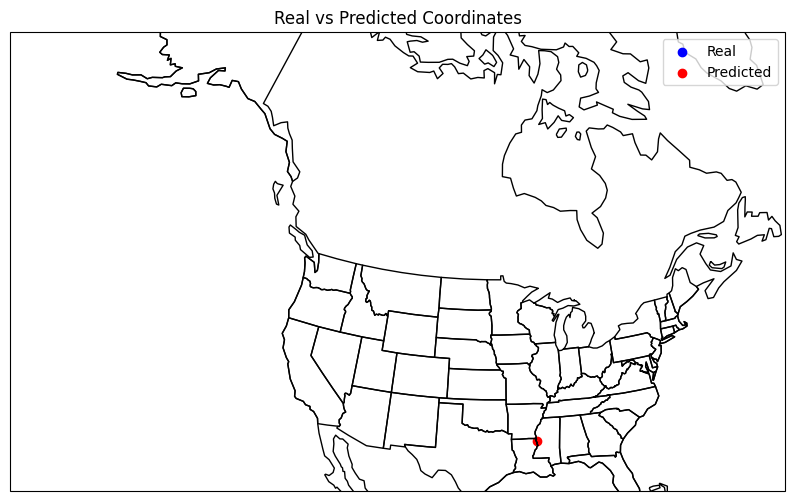

press anything to continue... 


Real -81.62221 26.018175
Pred -95.59172 33.510376


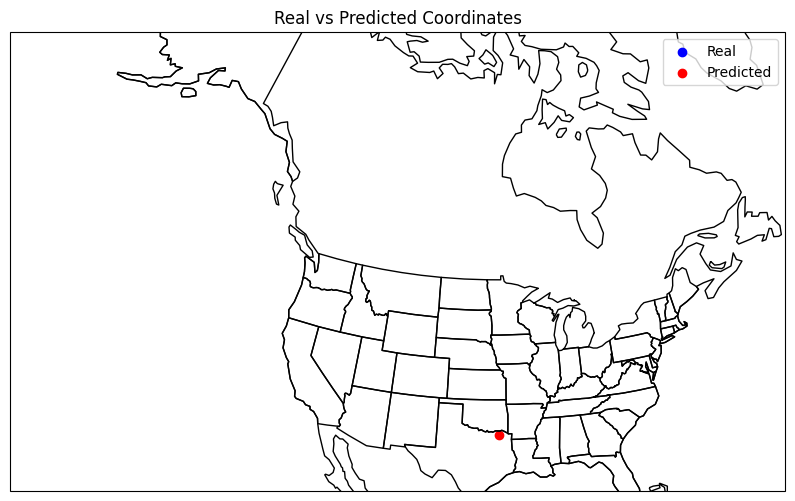

In [ ]:
for i in range(10):
    display_coords(real_coords[i], predicted_coords[i])
    input("press anything to continue...")